In [ ]:
#pip install tensorflow

In [37]:
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

In [34]:
#loading MNIST dataset

(x_train, y_train), (x_test,y_test)=load_data()
#reshaping training and testing dtat
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1], x_test.shape[2],1))

In [3]:
#normalizing the values of pixels of image
x_train=x_train.astype('float32')/255.0
x_test=x_train.astype('float32')/255.0

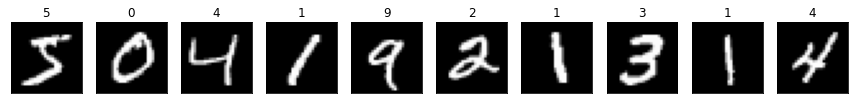

In [6]:
fig=plt.figure(figsize=(15,5))
for i in range(10):
  ax=fig.add_subplot(2,10, i+1,xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [7]:
#determine the shape of input images
img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [8]:
#identifying the model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

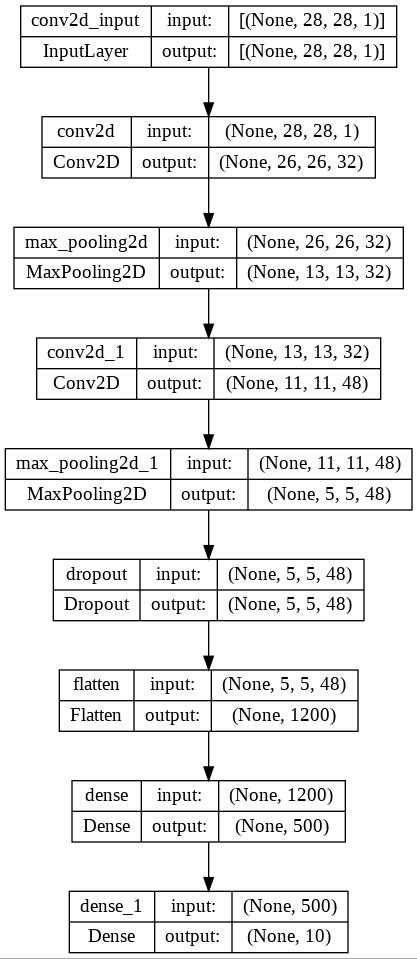

In [10]:
plot_model(model,'model.jpg', show_shapes=True)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x=model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 44s - loss: 0.2462 - accuracy: 0.9243 - val_loss: 0.0579 - val_accuracy: 0.9828 - 44s/epoch - 105ms/step
Epoch 2/10
422/422 - 43s - loss: 0.0826 - accuracy: 0.9744 - val_loss: 0.0390 - val_accuracy: 0.9907 - 43s/epoch - 101ms/step
Epoch 3/10
422/422 - 43s - loss: 0.0619 - accuracy: 0.9808 - val_loss: 0.0379 - val_accuracy: 0.9893 - 43s/epoch - 101ms/step
Epoch 4/10
422/422 - 44s - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0325 - val_accuracy: 0.9913 - 44s/epoch - 104ms/step
Epoch 5/10
422/422 - 42s - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0311 - val_accuracy: 0.9912 - 42s/epoch - 101ms/step
Epoch 6/10
422/422 - 42s - loss: 0.0386 - accuracy: 0.9874 - val_loss: 0.0284 - val_accuracy: 0.9933 - 42s/epoch - 100ms/step
Epoch 7/10
422/422 - 42s - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0314 - val_accuracy: 0.9913 - 42s/epoch - 100ms/step
Epoch 8/10
422/422 - 42s - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0288 - val_accuracy: 0.9932 - 42s/epoch - 100

In [38]:
loss, accuracy=model.evaluate(x_test, y_test, verbose=10)
print(f'Accuracy:{accuracy*100}')

Accuracy:99.08000230789185


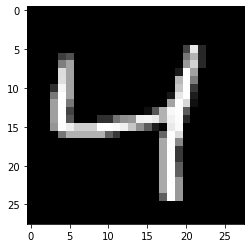

In [15]:
image=x_train[2]
#lets display the image which we want to predict
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [16]:
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
p=model.predict([image])
print('Predict:{}'.format(argmax(p)))

1/1 [==============================] - 0s 24ms/step
Predict:4
